In [1]:
import torch

minmx = torch.tensor(
    [
        (0.6063829660415649, 0.978723406791687),
        (0.523809552192688, 0.9333333373069763),
        (0.48923444747924805, 0.6913875341415405),
        (0.4000000059604645, 0.6625000238418579),
        (0.6355140209197998, 0.9252336621284485),
        (0.41260403394699097, 0.7086801528930664),
        (0.38074713945388794, 0.7155172228813171),
        (0.20879121124744415, 0.9340659379959106),
        (0.3874833583831787, 0.6404793858528137),
        (0.4219409227371216, 0.6540084481239319),
        (0.5852534770965576, 0.9308755993843079),
        (0.442176878452301, 0.6768707633018494),
        (0.624772310256958, 0.938069224357605),
        (0.5301390886306763, 0.9613600969314575),
        (0.47783932089805603, 0.8905817270278931),
        (0.008403361774981022, 0.9495798349380493),
        (0.5824176073074341, 0.995604395866394),
        (0.6239067316055298, 0.9446064233779907),
        (0.5648535490036011, 0.9414225816726685),
        (0.617862343788147, 0.9297218322753906),
        (0.4189349114894867, 0.6414201259613037),
        (0.44262295961380005, 0.7213114500045776),
        (0.5041322112083435, 0.9090909361839294),
        (0.6476684212684631, 0.9585492014884949),
        (0.3975609838962555, 0.6682927012443542),
        (0.03461538627743721, 0.949999988079071),
        (0.3035479485988617, 0.6084100008010864),
        (0.6434426307678223, 0.9631147384643555),
        (0.6000000238418579, 0.9733333587646484),
        (0.5673877000808716, 0.9517470598220825),
        (0.5384615659713745, 0.9230769276618958),
        (0.49696969985961914, 0.9696969985961914),
        (0.6354166865348816, 0.9270833134651184),
        (0.492290735244751, 0.7323788404464722),
        (0.5469387769699097, 0.9346938729286194),
        (0.6223506927490234, 0.9479768872261047),
        (0.44958677887916565, 0.6826446056365967),
        (0.4007989466190338, 0.6431424617767334),
        (0.4229075014591217, 0.6651982665061951),
        (0.4709821343421936, 0.7098214030265808),
        (0.34210526943206787, 0.5789473652839661),
        (0.34958383440971375, 0.6611177325248718),
        (0.3658536672592163, 0.5934959053993225),
        (0.34955185651779175, 0.596670925617218),
        (0.47340425848960876, 0.9414893388748169),
        (0.5477582812309265, 0.9376218318939209),
        (0.38751813769340515, 0.6574745774269104),
        (0.1803278625011444, 0.9836065769195557),
        (0.5923217535018921, 0.9341864585876465),
        (0.4858156144618988, 0.7044917345046997),
        (0.4431687593460083, 0.6888633966445923),
        (0.384436696767807, 0.6492450833320618),
        (0.4956521689891815, 0.9434782862663269),
        (0.4307524561882019, 0.7044711112976074),
        (0.3450064957141876, 0.6653696298599243),
        (0.3608490526676178, 0.6415094137191772),
        (0.1621621549129486, 0.9459459185600281),
        (0.4015747904777527, 0.6850393414497375),
        (0.10946745425462723, 0.9260355234146118),
        (0.5649635195732117, 0.9664233326911926),
        (0.3178808093070984, 0.9602649211883545),
        (0.4420772194862366, 0.6924101114273071),
        (0.43600866198539734, 0.7201735377311707),
        (0.6700767278671265, 0.9641943573951721),
        (0.5600000023841858, 0.9333333373069763),
        (0.43026003241539, 0.6832151412963867),
        (0.21311475336551666, 0.9426229596138),
        (0.6276276111602783, 0.954954981803894),
        (0.523809552192688, 0.918367326259613),
        (0.44512948393821716, 0.6596794128417969),
        (0.4832826852798462, 0.7122593522071838),
        (0.5836910009384155, 0.9399141669273376),
        (0.6111111044883728, 0.9629629850387573),
        (0.4590163826942444, 0.7423887848854065),
        (0.25581395626068115, 0.9127907156944275),
        (0.6025437116622925, 0.9602543711662292),
        (0.585106372833252, 0.957446813583374),
        (0.39249491691589355, 0.633874237537384),
        (0.04838709533214569, 0.975806474685669),
        (0.5988909602165222, 0.9242144227027893),
        (0.3970944285392761, 0.6355932354927063),
        (0.5361527800559998, 0.8867667317390442),
        (0.510869562625885, 0.9347826242446899),
        (0.4406047463417053, 0.6825054287910461),
        (0.25, 0.9696969985961914),
        (0.04800000041723251, 0.9599999785423279),
        (0.6136783957481384, 0.9426987171173096),
        (0.5888223648071289, 0.9481037855148315),
        (0.5769230723381042, 0.9230769276618958),
        (0.20930232107639313, 0.961240291595459),
        (0.4895833432674408, 0.9635416865348816),
        (0.380952388048172, 0.6362434029579163),
        (0.4756277799606323, 0.9364845156669617),
        (0.22580644488334656, 0.5483871102333069),
        (0.4246411621570587, 0.6375598311424255),
        (0.27407407760620117, 0.9777777791023254),
        (0.42824074625968933, 0.6921296119689941),
        (0.4247787594795227, 0.6584070920944214),
        (0.494047611951828, 0.9345238208770752),
        (0.5573770403862, 0.9617486596107483),
    ]
)


In [2]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Liver end')

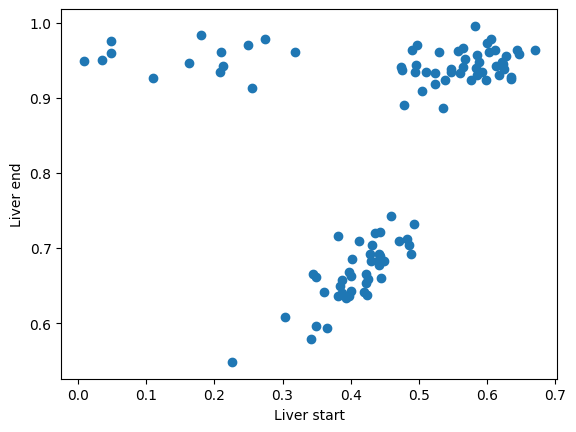

In [3]:
plt.scatter(minmx[:, 0], minmx[:, 1])
plt.xlabel('Liver start')
plt.ylabel('Liver end')